In [2]:
import nltk
import random
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re
from wordcloud import WordCloud

**Parte 1 - Conociendo el corpus**

In [3]:
# 1. Cargar corpus
nltk.download("movie_reviews")
from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\jayka\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [4]:
# 2. Estadísticas del corpus
total_reviews = len(movie_reviews.fileids())
pos_reviews = len(movie_reviews.fileids(categories=['pos']))
neg_reviews = len(movie_reviews.fileids(categories=['neg']))

print(f"Total de reseñas: {total_reviews}")
print(f"Reseñas positivas: {pos_reviews}")
print(f"Reseñas negativas: {neg_reviews}")

Total de reseñas: 2000
Reseñas positivas: 1000
Reseñas negativas: 1000


In [5]:
# 3. Mostrar 2 reseñas al azar (positiva y negativa)
pos_review = random.choice(movie_reviews.fileids(categories=['pos']))
neg_review = random.choice(movie_reviews.fileids(categories=['neg']))

# tokenizar
pos_words = movie_reviews.words(pos_review)
neg_words = movie_reviews.words(neg_review)

print("\nPrimeras 30 palabras de una reseña positiva:")
print(pos_words[:30])

print("\nPrimeras 30 palabras de una reseña negativa:")
print(neg_words[:30])


Primeras 30 palabras de una reseña positiva:
['jamaica', 'is', 'a', 'hot', 'vacation', 'spot', '.', 'the', 'exchange', 'rate', 'encourages', 'delusions', 'of', 'wealth', '(', 'approximately', '30', 'jamaican', 'dollars', 'to', 'one', 'american', ')', ',', 'the', 'sea', 'is', 'a', 'brilliant', 'blue']

Primeras 30 palabras de una reseña negativa:
['"', 'love', 'to', 'kill', '"', 'starts', 'off', 'aimlessly', 'and', 'gets', 'progressively', 'less', 'coherent', 'as', 'time', 'passes', '.', 'at', 'the', 'outset', ',', 'the', 'movie', 'appears', 'to', 'be', 'about', 'tony', 'danza', ',']


Al observar las primeras palabras de ambas reseñas, podemos notar diferencias en el tono y vocabulario.  

Las **reseñas positivas** suelen contener palabras como *excellent*, *enjoyable*, *best*, mientras que las **negativas** tienden a usar términos como *boring*, *terrible*, *waste*.  

También puede haber diferencias en la estructura de las oraciones y el uso de adjetivos.


**Parte 2 - Frecuencia de Palabras**

In [6]:
# 1. Separar en positivas y negativas
pos_fileids = movie_reviews.fileids(categories=['pos'])
neg_fileids = movie_reviews.fileids(categories=['neg'])

In [7]:
# 2. Tokenizar cada grupo
pos_words = movie_reviews.words(fileids=pos_fileids)
neg_words = movie_reviews.words(fileids=neg_fileids)

In [8]:
# 3. Frecuencia de todas las palabras
pos_freq = Counter(pos_words)
neg_freq = Counter(neg_words)


In [9]:
# 20 palabras más frecuentes de cada tipo de reseña
pos_words_df = pd.DataFrame(pos_freq.most_common(20), columns=['Palabra', 'Frecuencia'])
print("Top 20 palabras más frecuentes en reseñas positivas:")
display(pos_words_df)

Top 20 palabras más frecuentes en reseñas positivas:


,Palabra,Frecuencia
0,",",42448
1,the,41471
2,.,33714
3,a,20196
4,and,19896
5,of,18636
6,to,16517
7,',15268
8,is,14059
9,in,11725


In [10]:
neg_words_df = pd.DataFrame(neg_freq.most_common(20), columns=['Palabra', 'Frecuencia'])
print("\nTop 20 palabras más frecuentes en reseñas negativas:")
display(neg_words_df)


Top 20 palabras más frecuentes en reseñas negativas:


,Palabra,Frecuencia
0,",",35269
1,the,35058
2,.,32162
3,a,17910
4,and,15680
5,of,15487
6,to,15420
7,',15317
8,is,11136
9,in,10097


Observamos que muchas de las palabras más frecuentes son artículos, preposiciones y otros elementos gramaticales (como *the*, *a*, *and*, *of*) que no aportan información sobre el sentimiento.  

Estas palabras aparecen con alta frecuencia en ambos tipos de reseñas, por lo que no son útiles para diferenciarlas. Es necesario filtrar estas palabras para encontrar términos más informativos sobre el sentimiento.


**Parte 3 - Limpieza del texto**

In [ ]:
# 1. Descargar la lista de stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# 2. Filtrar las palabras elimnando stopwords y singos de puntuacion
stop_words = set(stopwords.words('english'))
punctuation = set([
    '.', ',', ':', ';', '!', '?', '(', ')', 
    '[', ']', '"', "'", '-', '--', '...'
    ])

def clean_words(words):
    # 3. Normalizar a minúsculas
    return [word.lower() for word in words 
            if word.lower() not in stop_words 
            and word not in punctuation
            and not re.match(r'^[^a-zA-Z0-9]+$', word)]

pos_words_clean = clean_words(pos_words)
neg_words_clean = clean_words(neg_words)

In [13]:
# 4. Recalcular la frecuencia de las palabras
pos_freq_clean = Counter(pos_words_clean)
neg_freq_clean = Counter(neg_words_clean)

pos_df = pd.DataFrame(pos_freq_clean.most_common(20), columns=['Palabra', 'Frecuencia'])

print("Top 20 palabras más frecuentes en reseñas positivas")
display(pos_df)


Top 20 palabras más frecuentes en reseñas positivas


,Palabra,Frecuencia
0,film,5230
1,one,3052
2,movie,2525
3,like,1802
4,good,1248
5,story,1246
6,time,1243
7,also,1200
8,even,1179
9,well,1123


In [14]:
neg_df = pd.DataFrame(neg_freq_clean.most_common(20), columns=['Palabra', 'Frecuencia'])

print("\nTop 20 palabras más frecuentes en reseñas negativas")
display(neg_df)


Top 20 palabras más frecuentes en reseñas negativas


,Palabra,Frecuencia
0,film,4287
1,movie,3246
2,one,2800
3,like,1888
4,even,1386
5,time,1168
6,good,1163
7,would,1090
8,get,1052
9,bad,1034


Después de la limpieza, podemos ver palabras más informativas sobre el sentimiento.  

En las **reseñas positivas** aparecen términos como *good*, *great*, *well*, *best*, que indican una valoración positiva.  

En las **negativas** encontramos palabras como *bad*, *nothing*, *even*, que pueden indicar desaprobación.  

El nuevo ranking refleja mejor el sentimiento de las reseñas, aunque aún hay palabras neutras que aparecen en ambos grupos.


**Parte 4 - Visualizacion y Comparacion**

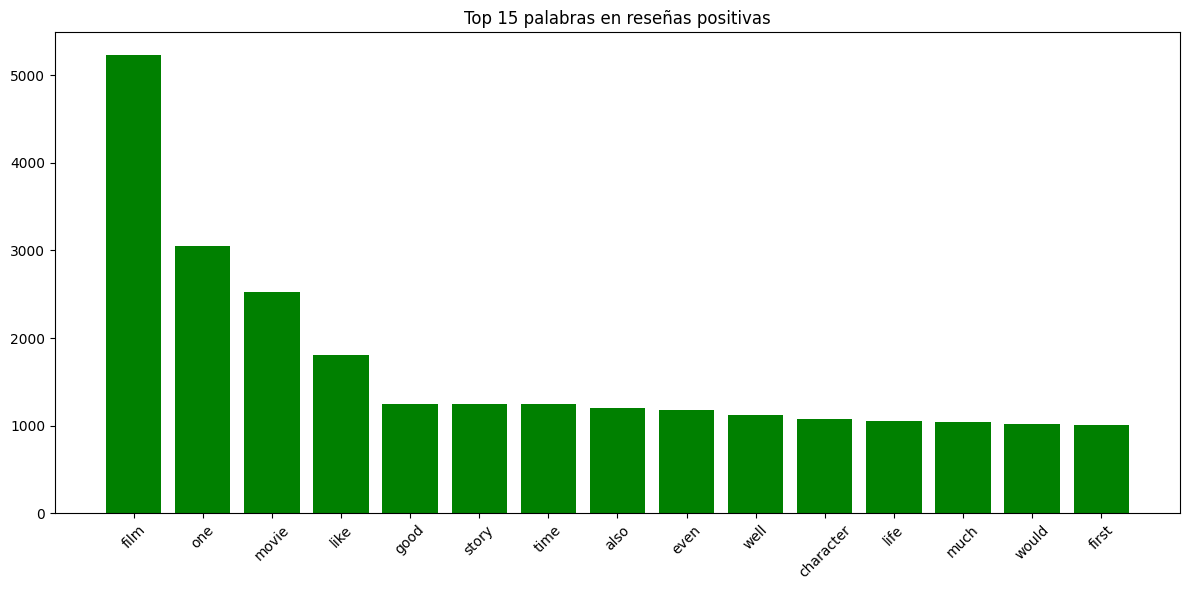

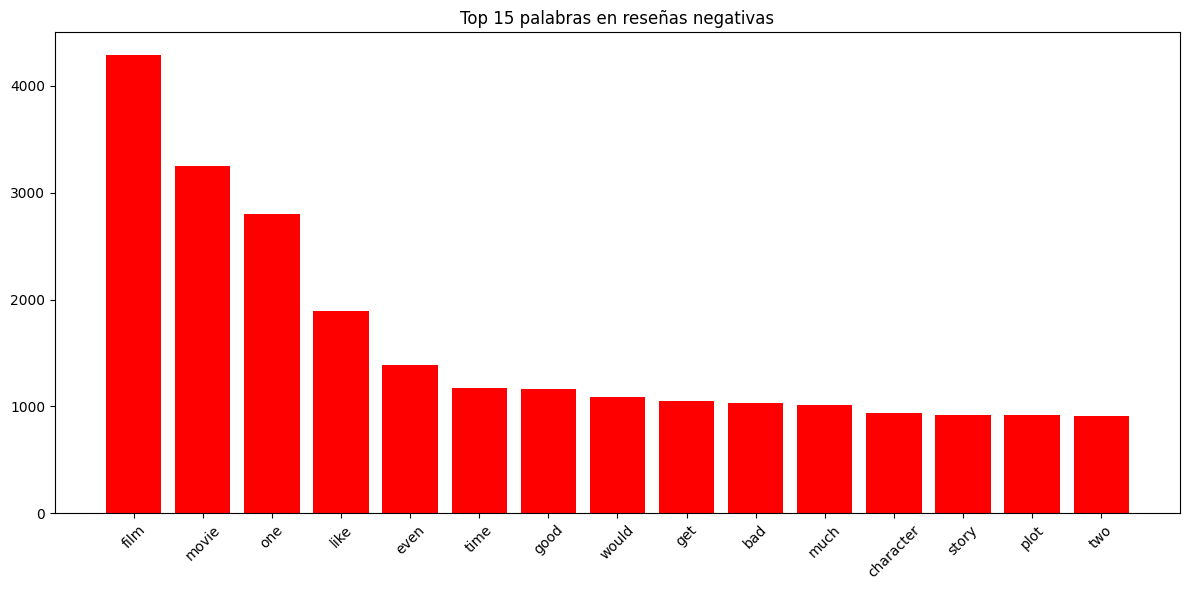

In [15]:
# 1. Grafico de barras para cada tipo de reseña
def plot_top_words(counter, title, color):
    words, counts = zip(*counter.most_common(15))
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color=color)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_words(pos_freq_clean, 'Top 15 palabras en reseñas positivas', 'green')
plot_top_words(neg_freq_clean, 'Top 15 palabras en reseñas negativas', 'red')

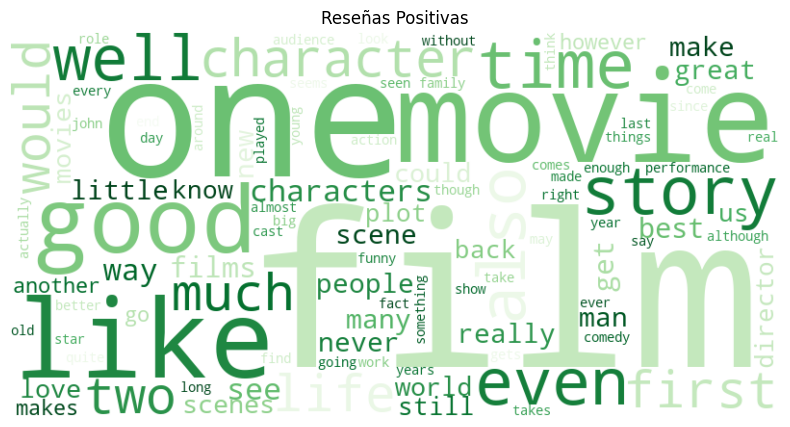

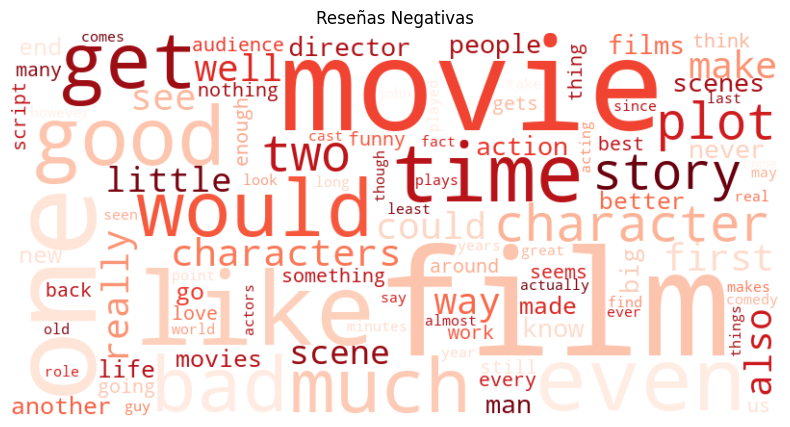

In [16]:
# 2. Nube de palabras
def generate_wordcloud(counter, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         colormap=colormap, max_words=100).generate_from_frequencies(dict(counter))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(pos_freq_clean, 'Reseñas Positivas', 'Greens')
generate_wordcloud(neg_freq_clean, 'Reseñas Negativas', 'Reds')


Las visualizaciones muestran claramente las diferencias en el vocabulario entre reseñas positivas y negativas.  

En las **positivas** destacan palabras como *film*, *movie*, *good*, *great*, *well*, que indican apreciación.  

En las **negativas** aparecen términos como *bad*, *just*, *like*, *time*, que pueden indicar desaprobación o indiferencia.  

Las **nubes de palabras** permiten identificar rápidamente los términos más característicos de cada tipo de reseña, mostrando el contraste semántico entre ambos grupos.
